In [1]:
import pandas as pd
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='52.66.79.237',
    database='servify_assignment',
    user='candidate',
    password='asdfgh123')

In [2]:
df_data_sold = pd.read_sql_query(
"SELECT * from sold_plan",
conn)

In [3]:
df_data_sold.head(2)

,SoldPlanID,PlanID,PlanAmount,FulfillerID,ConsumerProductID,ConsumerID,DateOfPurchase,DateOfActivation,ValidityDate,Status,Source,CreatedDate
0,183,19,1299,1,2289116,597286,2018-05-17 11:37:11,2018-05-25 06:46:54,2018-12-05,0,Store,2018-05-23 22:57:34
1,227,18,1499,1,13313689,655779,2018-04-29 20:22:46,2018-05-03 19:35:08,2017-12-04,1,Web,2018-05-17 06:27:03


# Exploring the Data

In [5]:
df_data_sold.head(5)
df_data_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23215 entries, 0 to 23214
Data columns (total 12 columns):
SoldPlanID           23215 non-null int64
PlanID               23215 non-null int64
PlanAmount           23215 non-null int64
FulfillerID          23215 non-null int64
ConsumerProductID    23215 non-null int64
ConsumerID           23215 non-null int64
DateOfPurchase       23215 non-null datetime64[ns]
DateOfActivation     23215 non-null datetime64[ns]
ValidityDate         23215 non-null datetime64[ns]
Status               23215 non-null int64
Source               23215 non-null object
CreatedDate          23215 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(7), object(1)
memory usage: 2.1+ MB


# Summarization of Data Statistically
No Missing Values

In [7]:
df_data_sold.describe()

,SoldPlanID,PlanID,PlanAmount,FulfillerID,ConsumerProductID,ConsumerID,Status
count,2.321500e+04,23215.000000,23215.000000,23215.0,2.321500e+04,23215.000000,23215.000000
mean,9.993116e+05,9.986000,1348.950463,1.0,1.002056e+07,501018.936463,0.232393
std,5.750154e+05,5.474269,228.041644,0.0,5.777678e+06,287227.354238,2.165259
min,1.830000e+02,1.000000,999.000000,1.0,2.305000e+03,56.000000,-3.000000
25%,5.035295e+05,5.000000,1299.000000,1.0,5.013360e+06,255174.500000,-3.000000
50%,9.996500e+05,10.000000,1299.000000,1.0,1.004843e+07,498297.000000,0.000000
75%,1.498953e+06,15.000000,1499.000000,1.0,1.502322e+07,749913.500000,1.000000
max,1.999999e+06,19.000000,1599.000000,1.0,1.999927e+07,999966.000000,3.000000


In [8]:
df_data_sold.head(2)

,SoldPlanID,PlanID,PlanAmount,FulfillerID,ConsumerProductID,ConsumerID,DateOfPurchase,DateOfActivation,ValidityDate,Status,Source,CreatedDate
0,183,19,1299,1,2289116,597286,2018-05-17 11:37:11,2018-05-25 06:46:54,2018-12-05,0,Store,2018-05-23 22:57:34
1,227,18,1499,1,13313689,655779,2018-04-29 20:22:46,2018-05-03 19:35:08,2017-12-04,1,Web,2018-05-17 06:27:03


# Average number of plans sold per week

In [11]:
####Converting the Date of Purchase into Week_year 
df_data_sold['WeekNumber'] = df_data_sold['DateOfPurchase'].dt.week
df_data_sold.head(10)
df_data_sold['WeekYear'] = df_data_sold['DateOfPurchase'].apply(lambda x: "%d/%d" % (x.week, x.year))
df_data_sold.head(2)

,SoldPlanID,PlanID,PlanAmount,FulfillerID,ConsumerProductID,ConsumerID,DateOfPurchase,DateOfActivation,ValidityDate,Status,Source,CreatedDate,WeekNumber,WeekYear
0,183,19,1299,1,2289116,597286,2018-05-17 11:37:11,2018-05-25 06:46:54,2018-12-05,0,Store,2018-05-23 22:57:34,20,20/2018
1,227,18,1499,1,13313689,655779,2018-04-29 20:22:46,2018-05-03 19:35:08,2017-12-04,1,Web,2018-05-17 06:27:03,17,17/2018


In [26]:
df1 = df_data_sold.groupby(['WeekYear']).count()
df1.head(2)
df2 = df_data_sold.groupby(['WeekYear','DateOfPurchase', 'SoldPlanID']).size().reset_index(name='counts')
df2
df2['DateOfPurchase'] = df2['DateOfPurchase'].dt.date
df3 = df2.groupby(['WeekYear','DateOfPurchase'])['counts'].sum().reset_index(name='totalperday')
df3.head(2)
df4 = df3.groupby(['WeekYear'])['totalperday'].sum().reset_index(name='TotalPlansSoldPerWeek')
df4
df4 = df3.groupby(['WeekYear'])['totalperday'].mean().reset_index(name='AverageofTotalPlansSoldPerWeek')
df4

,WeekYear,AverageofTotalPlansSoldPerWeek
0,1/2017,13.000000
1,1/2018,51.857143
2,10/2016,2.285714
3,10/2017,14.857143
4,10/2018,59.857143
5,11/2016,4.166667
6,11/2017,16.714286
7,11/2018,60.857143
8,12/2016,2.857143
9,12/2017,15.714286


# Bar Graph

In [27]:
#Plotting a bar graph

<IPython.core.display.Javascript object>


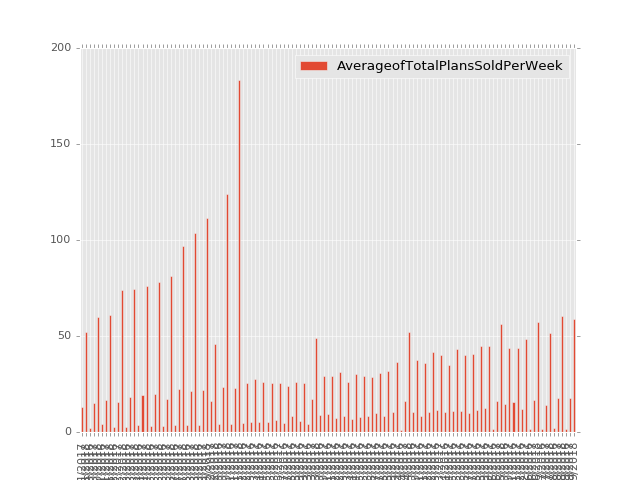

In [34]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
df4.plot(x='WeekYear', y='AverageofTotalPlansSoldPerWeek', kind='bar')